In [20]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from __future__ import division

In [2]:
import pandas as pd

path_to_train = './train.csv'
tr = pd.read_csv(path_to_train, encoding='utf-8')

In [3]:
tr.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0
1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1
2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1
3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1


In [76]:
us_gr = tr.groupby(['user_id'])["genre_id"].apply(lambda x: len(x.unique()))
#FOR EACH USER

In [77]:
len(us_gr)

19918

In [78]:
print min(us_gr)   # Мінімальне і максимальне число прослуханих жанрів
print max(us_gr)

1
281


In [79]:
d = [us_gr[i] for i in range(len(us_gr)) if us_gr[i] == 1]
print len(d)
print len(d)/len(us_gr)*100, "Percent of people who listened just to one genre"

1569
7.87729691736 Percent of people who listened just to one genre


8% (1569) користувачів слухали лиш один жанр! можливо, є сенс, що вони прослухають пісню цього ж жанру, але це ще не факт

In [80]:
large_num_genres = [us_gr[i] for i in range(len(us_gr)) if us_gr[i] >100]
print len(large_num_genres)/len(us_gr)*100, "Percent of people who listened to more than 100 genres"

0.83341700974 Percent of people who listened to more than 100 genres


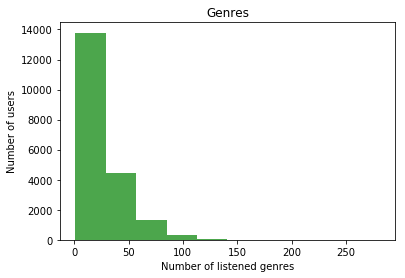

In [81]:
#plt.subplot(1, 1)
#plt.plot(us_gr)
us_gr.plot.hist(alpha=0.7, facecolor='green')

plt.title('Genres')
plt.xlabel('Number of listened genres')
plt.ylabel('Number of users')
plt.show()

Більшість юзерів прослухали менше 25 жанрів, хоча є і якийсь дивний меломан, який прослухав 281 жанр. 

In [82]:
usr_alb = tr.groupby(['user_id'])["album_id"].apply(lambda x: len(x.unique()))

In [83]:
print 'Maximum albums', max(usr_alb)
print 'Minimum albums', min(usr_alb)

Maximum albums 2117
Minimum albums 1


In [84]:
large_num_alb = [usr_alb[i] for i in range(len(usr_alb)) if usr_alb[i] > 800]
print len(large_num_alb)
print len(large_num_alb)/len(usr_alb)*100

176
0.8836228537


In [85]:
small_num_alb = [usr_alb[i] for i in range(len(usr_alb)) if usr_alb[i] == 1]
print len(small_num_alb)/len(usr_alb)*100

2.22411888744


2.2% слухали лише один альбом
Чи варто дивитись, скільки пісень у тих альбомах? Мабуть, більша імовірність, що вони прослухають таки пісні з того алюбому або принаймні того співака.

In [86]:
num_alb = [usr_alb[i] for i in range(len(usr_alb)) if usr_alb[i] < 400]
print len(num_alb)/len(usr_alb)*100

91.9419620444


92% юзерів прослухали менше ніж 400 альбомів 
Як враховувати тих, хто прослуховують набагато більше? Для них складніший collaborative filtering? 

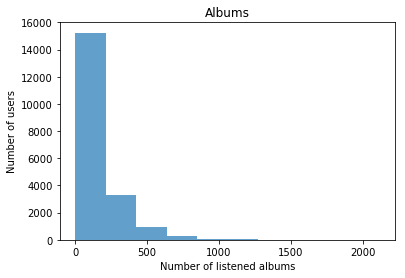

In [32]:
usr_alb.plot.hist(alpha=0.7)

plt.title('Albums')
plt.xlabel('Number of listened albums')
plt.ylabel('Number of users')
plt.show()

In [87]:
usr_art = tr.groupby(['user_id'])["artist_id"].apply(lambda x: len(x.unique()))
print max(usr_art), "Maximum artists"

1419 Maximum artists


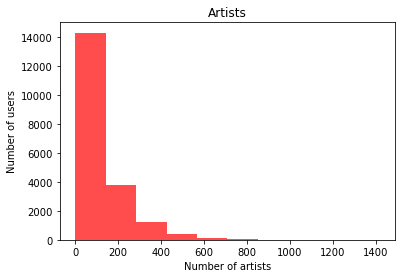

In [88]:
usr_art.plot.hist(alpha=0.7, facecolor='red')

plt.title('Artists')
plt.xlabel('Number of artists')
plt.ylabel('Number of users')
plt.show()

In [89]:
num_art = [usr_art[i] for i in range(len(usr_art)) if usr_art[i] < 400]
print len(num_art)/len(usr_art)*100

96.4353850788


96% юзерів слухали менше ніж 400 співаків

In [68]:
num_art = [usr_art[i] for i in range(len(usr_art)) if usr_art[i] == 1]
print len(num_art)/len(usr_art)*100

2.70609498946


2.7 % слухають лише одного! Чи це означає, що алгоритм їм порадить тільки цього співака? Яка ймовірність, що вони прослухають трек іншого виконавця? 

# Flow

In [97]:
usr_art_flow = tr.groupby(['user_id', 'listen_type'])["artist_id"].apply(lambda x: len(x.unique()))
print max(usr_art_flow), "Maximum artists"

1278 Maximum artists


In [98]:
usr_art_flow.head()

user_id  listen_type
0        0               987
         1               511
1        0              1029
         1               696
2        0               548
Name: artist_id, dtype: int64

In [99]:
print min(usr_art_flow), "Min artists"

1 Min artists
